## Lab 2

```
Alexander Baquiax
PIO | Econometría II
12007988
```


## Parte 1: Numpy

Para los ejercicios siguiente genere el código que considere para resolver el problema que se le plantea.

1. ¿Cuál es el tamaño en bytes de un array de `1000` elementos de tipo booleano? 

In [8]:
import numpy as np
import sys

In [20]:
booleans = np.full(1000, True)
bytes_size =booleans.itemsize * booleans.size
print(booleans)
bytes_size
print(f"\nbooleans array size: {bytes_size} bytes; the logic behind is that each boolean uses 1B of memory and the array has 100 elements")

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

2. Cree un array cuyos elementos sean los enteros pares en  `[1,100]` y en orden decreciente. Muestre los `10` últimos por pantalla.

In [30]:
even_numbers = np.arange(1, 101)
even_numbers = even_numbers[even_numbers % 2 == 0]
even_numbers[len(even_numbers) - 10:]

array([ 82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

3. Dado el array  
```
2 4 5 6 
0 3 7 4 
8 8 5 2 
1 5 6 1 
```

Seleccione con una instrucción el subarray de elementos  
```
0 3 7 4
```

Después, seleccione el subarray de elementos  
```
2 5 
8 5
```

In [31]:
matrix = np.matrix("2 4 5 6; 0 3 7 4 ; 8 8 5 2; 1 5 6 1")
matrix

matrix([[2, 4, 5, 6],
        [0, 3, 7, 4],
        [8, 8, 5, 2],
        [1, 5, 6, 1]])

In [32]:
matrix[1]

matrix([[0, 3, 7, 4]])

In [38]:
matrix[np.ix_([0, 2], [0, 2])]

matrix([[2, 5],
        [8, 5]])

4. Dados los arrays `a = [1, 4, 2, 7]` y `b = [1, 3, 2, 9]`, obtenga la _media aritmética_ de la diferencia `(a-b)`

In [41]:
a = np.array([1, 4, 2, 7 ])
b = np.array([1, 3, 2, 9])
print(a-b)
np.mean(a-b)

[ 0  1  0 -2]


-0.25

4. Tengo valores de cordenadas (x, y) en las columnas del array 

```
1.33 4.5 
30.0 10.7 
70.2 0.5 
```
Agregue a este array las coordenadas `(37.1, -3.6)`. 

Muestre en pantalla las dimensiones del nuevo array. 

In [52]:
matrix = np.matrix([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
print(matrix)

matrix = np.append(matrix, [[37.1, -3.6]], axis=0)
print(f"\n{matrix}")


[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]]

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


6. Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: `(10.8, 3.0)` y `(35.8, 12.0)`.

In [58]:
transposed = np.transpose(matrix)
transposed

matrix([[ 1.33, 30.  , 70.2 , 37.1 ],
        [ 4.5 , 10.7 ,  0.5 , -3.6 ]])

In [66]:
np.append(transposed, [[10.8, 35.8], [3.0, 12.0]], axis=1)

matrix([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 , 35.8 ],
        [ 4.5 , 10.7 ,  0.5 , -3.6 ,  3.  , 12.  ]])

## Parte 2: Exploración y minería de datos

Con  el  dataset  `nucleospoblacion.csv`  adjunto  al  laboratorio, luego  responda  las  siguientes  preguntas  usando  pandas  y  matplotlib.

In [67]:
import pandas as pd

In [85]:
data = pd.read_csv("nucleospoblacion.csv")
data.head()


,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


#### 1.  ¿Cuántos Municipios tienen más de 100000 habitantes?

In [81]:
result = data[data['Poblacion'] > 100000]
result.head



<bound method NDFrame.head of      FID  OBJECTID                       Texto  Poblacion  CodMun  \
9      9        10  Las Palmas de Gran Canaria   383308.0   35016   
16    16        17                       Telde   100900.0   35026   
28    28        29  San Cristóbal de La Laguna   152222.0   38023   
40    40        41      Santa Cruz de Tenerife   222643.0   38038   
42    42        43                     Badajoz   150376.0    6015   
..   ...       ...                         ...        ...     ...   
683  683       684    Santa Coloma de Gramenet   120060.0    8245   
689  689       690                    Terrassa   212724.0    8279   
725  725       726                      Lleida   137387.0   25120   
735  735       736                        Reus   106622.0   43123   
737  737       738                   Tarragona   140184.0   43148   

                      Municipio  CodProvin               Provincia          X  \
9    Las Palmas de Gran Canaria         35              Las 

In [119]:
result.size

620

#### 2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda: 
 
    1. ¿Cuál es la segunda ciudad más poblada? 
    2. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas? 

<AxesSubplot:xlabel='Municipio'>

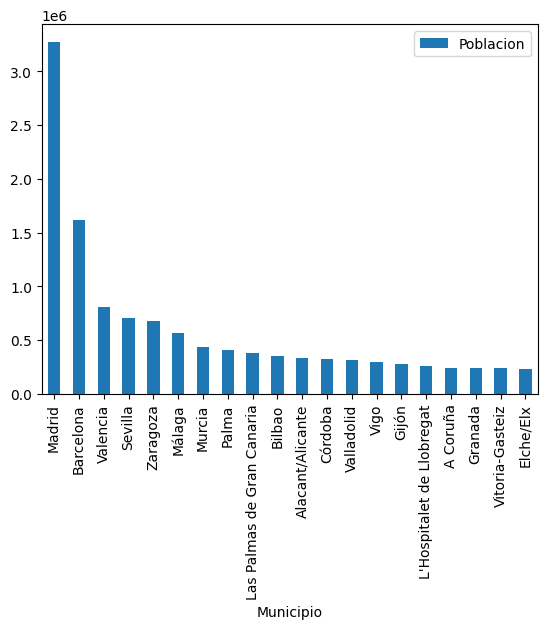

In [118]:
import matplotlib.pyplot as plt
data.sort_values(by=['Poblacion'], ascending=False)[:20].plot.bar(x='Municipio', y='Poblacion')


1. La ciudad más pobalda es `Madrid`

2. La posición de `Granada` con base a la gráfica es `18`
   

#### 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [123]:
data[data["Poblacion"] > 5000].size

8520

#### 4. ¿Cuál es el municipio situado más al Norte? (Usar el  valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [126]:
data.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [134]:
result = data.sort_values(by=['Y'], ascending=False)[:1]
result

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
104,104,105,Viveiro,16211.0,27066,Viveiro,27,Lugo,-7.588768,43.625578


In [137]:
print(f"Municipio: {result['Municipio'].values[0]}, Provincia: {result['Provincia'].values[0]}, Poblacion: {result['Poblacion'].values[0]}")

Municipio: Viveiro, Provincia: Lugo, Poblacion: 16211.0


#### 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [139]:
granada = data[data['Provincia'] == 'Granada']
granada.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
266,266,267,Albolote,17637.0,18003,Albolote,18,Granada,-3.657480,37.230902
267,267,268,Almuñécar,27703.0,18017,Almuñécar,18,Granada,-3.690916,36.734414
268,268,269,Armilla,21895.0,18021,Armilla,18,Granada,-3.626903,37.140314
269,269,270,Atarfe,15945.0,18022,Atarfe,18,Granada,-3.688734,37.222711
270,270,271,Baza,21982.0,18023,Baza,18,Granada,-2.774856,37.490778


In [144]:
mean = granada["Poblacion"].mean()
print(f"media: {mean}")


media:30217.85


In [146]:
meadian = granada["Poblacion"].median()
print(f"mediana: {meadian}")

mediana: 17526.0


In [148]:
std = granada["Poblacion"].std()
print(f"desviacion estandar: {std}")

desviacion estandar: 50355.49171459276


In [149]:
max = granada["Poblacion"].max()
print(f"máximo: {max}")

maximo: 239154.0


In [150]:
min = granada["Poblacion"].min()   
print(f"mínimo: {min}")

mínimo: 10386.0


#### 6. Realice un histograma con la población de los Municipios para cada una de las provincias.

<AxesSubplot:ylabel='Frequency'>

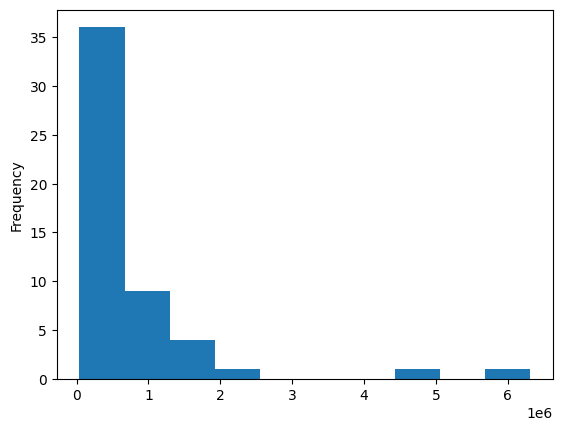

In [167]:
grouped = data.groupby("Provincia")["Poblacion"].sum()

grouped.plot.hist()

#### 7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [171]:
sample = data.sample(50)

print(f"media: {sample['Poblacion'].mean()}")
print(f"desviación estandar: {sample['Poblacion'].std()}")

media: 52965.46
desviación estandar: 97697.7569982974


### 8. Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [187]:
def get_distance(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

madrid_x=-3.703797076
madrid_y=40.4166300011

data["distance_from_madrid"] = data.apply(lambda row: get_distance(madrid_x, madrid_y, row["X"], row["Y"]), axis=1)


sorted_data = data.sort_values(by=['distance_from_madrid'], ascending=True)

sorted_data.head()


,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,distance_from_madrid
355,355,356,Madrid,3273049.0,28079,Madrid,28,Madrid,-3.703797,40.416630,0.000000
783,783,784,Humera-Somosaguas-prado del Rey,14800.0,28115,Pozuelo de Alarcón,28,Madrid,-3.783853,40.428764,0.080970
780,780,781,El Bercial,12814.0,28065,Getafe,28,Madrid,-3.736771,40.327270,0.095249
781,781,782,Fortuna,12840.0,28074,Leganés,28,Madrid,-3.780326,40.358067,0.096365
354,354,355,Leganés,187227.0,28074,Leganés,28,Madrid,-3.766556,40.331744,0.105567


In [188]:
sorted_data.tail()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,distance_from_madrid
21,21,22,Adeje,43801.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729708,28.118880,17.913933
764,764,765,Playa de las Américas,18562.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729436,28.068070,17.948654
765,765,766,Los Cristianos,19383.0,38006,Arona,38,Santa Cruz de Tenerife,-16.716798,28.053827,17.949292
35,35,36,Santa Cruz de la Palma,17128.0,38037,Santa Cruz de la Palma,38,Santa Cruz de Tenerife,-17.765386,28.684138,18.313373
29,29,30,Los Llanos de Aridane,20948.0,38024,Los Llanos de Aridane,38,Santa Cruz de Tenerife,-17.914361,28.658639,18.444254


In [178]:
print(f"municipio más cercano a Madrid: {sorted_data['Municipio'].values[1]}")
print(f"municipio más lejano a Madrid: {sorted_data['Municipio'].values[len(sorted_data) - 1]}")


municipio más cercano a Madrid: Pozuelo de Alarcón
municipio más lejano a Madrid: Los Llanos de Aridane
